In [1]:
%matplotlib inline

In [3]:
from fastai2.vision.all import *
from nbdev.showdoc import *
set_seed(2)

In [9]:
path = untar_data(URLs.PETS); path
path_anno = path/'annotations'
path_img = path/'images'
fnames = get_image_files(path_img)

In [11]:
bs=64

In [12]:
dls = ImageDataLoaders.from_path_re(path_img, fnames, pat=r'(.+)_\d+.jpg$', item_tfms=RandomResizedCrop(460, min_scale=0.75), 
                                    bs=bs//2, batch_tfms=[*aug_transforms(size=299, max_warp=0), 
                                    Normalize.from_stats(*imagenet_stats)])

In [13]:
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/ubuntu/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:05<00:00, 19.6MB/s]


(0.006918309628963471, 0.0008317637839354575)

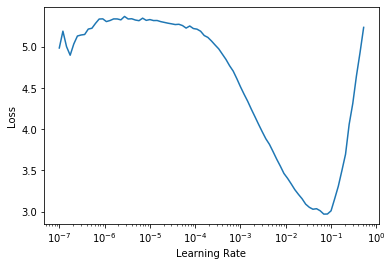

In [14]:
learn.lr_find()

In [15]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.532103,0.222897,0.064953,00:27


In [16]:
learn.save('stage-1-50')

In [17]:
learn.unfreeze()
learn.fit_one_cycle(3, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.314422,0.193882,0.060893,00:34
1,0.239904,0.175544,0.058187,00:33
2,0.181905,0.170867,0.054804,00:33


In [18]:
learn.load('stage-1-50');

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

In [20]:
interp.most_confused(min_val=2)

[('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Ragdoll',
  '/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Birman',
  10),
 ('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier',
  '/home/ubuntu/.fastai/data/oxford-iiit-pet/images/american_bulldog',
  9),
 ('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/boxer',
  '/home/ubuntu/.fastai/data/oxford-iiit-pet/images/american_bulldog',
  5),
 ('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Bengal',
  '/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau',
  4),
 ('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Bengal',
  '/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Abyssinian',
  3),
 ('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/British_Shorthair',
  '/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Russian_Blue',
  3),
 ('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Siamese',
  '/home/ubuntu/.fastai/data/oxford-iiit-pet/images/Birman',
  3),
 ('/home/ubuntu/.fastai/data/oxford